Brief

Dessiner un Heatmap des corrélations des caractéristiques qui vous semblent pertinentes d'observer ? Discuter les résultats
Tracer l'evolution sur un même graphique des hospitalisations et des réanimations, pour les Femmes et pour les hommes. Discuter les résultats
Tracer sut le même graphique le nombre de décès cumulés pour les hommes et pour les femmes, mais sur une échelle verticale différente/sépare (plt.twinx?)
Quelle est la probabilité pour un Français (vs) une Française de mourir du Covid au début de la période disponible ? à la fin de la période disponible 

In [28]:
# pre-requis 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd 
import seaborn as sns
from IPython.display import display, HTML
from datetime import datetime

Afficher les 15 premières lignes du tableau covid_sexe.csv. (df.head?)
 0= H+F
1 = H
2 =F

In [4]:
datas=pd.read_csv('reduced_covid_sexe.csv')
datas

,Unnamed: 0,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
0,sexe,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0
1,jour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-18,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0
3,2020-03-19,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0
4,2020-03-20,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2023-03-27,13113.0,5950.0,6923.0,728.0,457.0,263.0,861972.0,421189.0,432745.0,135936.0,77555.0,57324.0
1107,2023-03-28,13178.0,6000.0,6943.0,720.0,452.0,261.0,862458.0,421407.0,433007.0,135975.0,77575.0,57342.0
1108,2023-03-29,13184.0,5989.0,6964.0,734.0,456.0,270.0,862962.0,421645.0,433268.0,136009.0,77594.0,57356.0
1109,2023-03-30,13186.0,5953.0,7003.0,732.0,459.0,267.0,863331.0,421833.0,433447.0,136045.0,77609.0,57376.0


In [12]:
metadatas=pd.read_csv('metadata_covid_sexe.csv', encoding="latin-1")
metadatas

,Colonne;Type ;Description_FR;Description_EN;Exemple
0,dep;integer;DÃ©partement;Department;1
1,sexe;integer;Sexe ;Sex ;0
2,jour;string($date);Date de notification ;Date ...
3,hosp;integer;Nombre de personnes actuellement ...
4,rea;integer;Nombre de personnes actuellement e...
5,rad;integer;Nombre cumulé de personnes retourn...
6,dc;integer;Nombre cumulé de personnes décédées...
7,ssr_usld;integer;Nombre de personnes actuellem...
8,hospconv;integer;Nombre de personnes actuellem...
9,autres ;integer;Nombre de personnes actuelleme...


In [15]:
data_covid_s = pd.merge(datas, metadatas)
data_covid_s

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

Afficher les 15 premières lignes du tableau covid_sexe.csv.

In [16]:
# check dimension
datas.shape

datas.head(15)

,Unnamed: 0,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
0,sexe,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0
1,jour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-18,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0
3,2020-03-19,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0
4,2020-03-20,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0
5,2020-03-21,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,1811.0,881.0,888.0,525.0,297.0,219.0
6,2020-03-22,6954.0,3906.0,2815.0,1674.0,1176.0,461.0,2117.0,1031.0,1040.0,632.0,356.0,263.0
7,2020-03-23,8673.0,4882.0,3532.0,2080.0,1465.0,569.0,2567.0,1270.0,1247.0,860.0,497.0,350.0
8,2020-03-24,10163.0,5843.0,4149.0,2503.0,1773.0,694.0,3281.0,1609.0,1624.0,1100.0,661.0,425.0
9,2020-03-25,12072.0,7064.0,4856.0,2935.0,2127.0,785.0,4085.0,2000.0,2028.0,1388.0,818.0,557.0


fficher les 15 dernières lignes du tableau covid_sexe.csv. (df.tail?)

In [17]:
datas.tail(15)

,Unnamed: 0,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
1096,2023-03-17,13279.0,5982.0,7058.0,755.0,461.0,285.0,858444.0,419559.0,430886.0,135726.0,77437.0,57233.0
1097,2023-03-18,13205.0,5973.0,6995.0,752.0,462.0,282.0,858672.0,419653.0,431016.0,135737.0,77441.0,57240.0
1098,2023-03-19,13211.0,5979.0,6995.0,754.0,463.0,283.0,858680.0,419655.0,431022.0,135737.0,77441.0,57240.0
1099,2023-03-20,13358.0,6052.0,7068.0,760.0,469.0,282.0,859128.0,419870.0,431252.0,135787.0,77467.0,57264.0
1100,2023-03-21,13434.0,6083.0,7109.0,761.0,463.0,289.0,859586.0,420088.0,431488.0,135822.0,77489.0,57276.0
1101,2023-03-22,13418.0,6088.0,7090.0,761.0,469.0,283.0,860128.0,420329.0,431778.0,135835.0,77495.0,57283.0
1102,2023-03-23,13025.0,5912.0,6870.0,739.0,456.0,273.0,860867.0,420652.0,432187.0,135860.0,77512.0,57291.0
1103,2023-03-24,13103.0,5937.0,6917.0,751.0,466.0,275.0,861310.0,420874.0,432408.0,135875.0,77521.0,57297.0
1104,2023-03-25,13038.0,5902.0,6890.0,744.0,463.0,271.0,861538.0,420987.0,432518.0,135889.0,77527.0,57305.0
1105,2023-03-26,13036.0,5903.0,6889.0,746.0,466.0,270.0,861565.0,420997.0,432534.0,135894.0,77530.0,57307.0


Afficher les dataframe du metadata_sexe ? a quoi sert t'il ?
alors ca c'est une tres bonne question
je dirais a donner les categories

Quelle est la période temporelle sur laquelle s'étendent les données ?

In [89]:
datasend=datas['Unnamed: 0'].iloc[-1]
dt = datetime.strptime(datasend.replace('-','/'), "%Y/%m/%d")
dt

datetime.datetime(2023, 3, 31, 0, 0)

In [93]:
datastart=datas['Unnamed: 0'][2]
ds = datetime.strptime(datastart.replace('-','/'), "%Y/%m/%d")
ds

datetime.datetime(2020, 3, 18, 0, 0)

In [94]:
dataduration=(dt- ds)
dataduration

datetime.timedelta(days=1108)

Dessiner un Heatmap des corrélations des caractéristiques qui vous semblent pertinentes d'observer ? Discuter les résultats

In [6]:
import matplotlib as mpl

In [37]:
 
df = pd.DataFrame(datas)
df = pd.DataFrame({'A': datas['rea'], 'B': datas['rea.1']})
df['A'].corr(df['B'])

fig, ax = plt.subplots()
im = ax.imshow()


0.9963816712004722

In [66]:
df = pd.DataFrame(datas)
df =df.iloc[0:-1]
df=df.drop('Unnamed: 0', axis=1)
df=df.dropna(axis=0)
df

,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0
2,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0
3,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0
4,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0
5,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,1811.0,881.0,888.0,525.0,297.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1105,13036.0,5903.0,6889.0,746.0,466.0,270.0,861565.0,420997.0,432534.0,135894.0,77530.0,57307.0
1106,13113.0,5950.0,6923.0,728.0,457.0,263.0,861972.0,421189.0,432745.0,135936.0,77555.0,57324.0
1107,13178.0,6000.0,6943.0,720.0,452.0,261.0,862458.0,421407.0,433007.0,135975.0,77575.0,57342.0
1108,13184.0,5989.0,6964.0,734.0,456.0,270.0,862962.0,421645.0,433268.0,136009.0,77594.0,57356.0


In [67]:
df.corr()


,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
hosp,1.000000,0.992849,0.993597,0.747039,0.745209,0.729396,0.048526,0.047834,0.049291,0.068078,0.069238,0.066550
hosp.1,0.992849,1.000000,0.973081,0.811228,0.812677,0.784291,-0.041273,-0.041764,-0.040698,-0.017294,-0.016182,-0.018767
hosp.2,0.993597,0.973081,1.000000,0.677698,0.672892,0.668883,0.127809,0.126970,0.128718,0.143331,0.144543,0.141749
rea,0.747039,0.811228,0.677698,1.000000,0.996379,0.980402,-0.385390,-0.382280,-0.388115,-0.317076,-0.315818,-0.318546
rea.1,0.745209,0.812677,0.672892,0.996379,1.000000,0.960137,-0.422611,-0.420168,-0.424748,-0.363648,-0.362471,-0.365073
rea.2,0.729396,0.784291,0.668883,0.980402,0.960137,1.000000,-0.288997,-0.284407,-0.293026,-0.200830,-0.199417,-0.202365
rad,0.048526,-0.041273,0.127809,-0.385390,-0.422611,-0.288997,1.000000,0.999895,0.999919,0.981053,0.980589,0.981414
rad.1,0.047834,-0.041764,0.126970,-0.382280,-0.420168,-0.284407,0.999895,1.000000,0.999630,0.983512,0.983085,0.983841
rad.2,0.049291,-0.040698,0.128718,-0.388115,-0.424748,-0.293026,0.999919,0.999630,1.000000,0.978731,0.978234,0.979118
dc,0.068078,-0.017294,0.143331,-0.317076,-0.363648,-0.200830,0.981053,0.983512,0.978731,1.000000,0.999991,0.999990


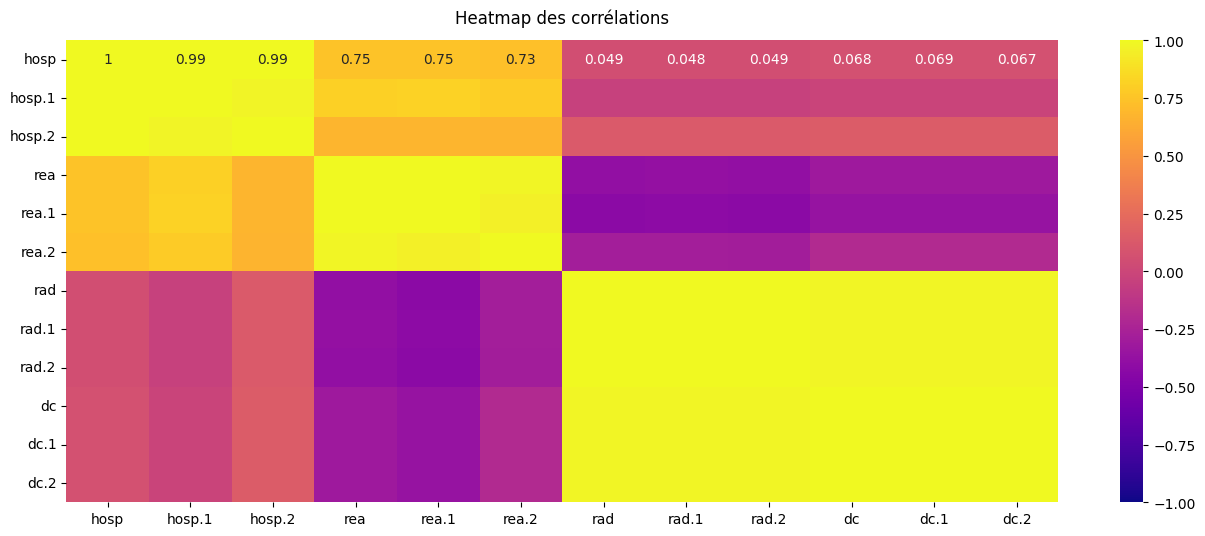

In [74]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='plasma')
heatmap.set_title('Heatmap des corrélations', fontdict={'fontsize':12}, pad=12 )
plt.show()

C:\Users\briac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\briac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\briac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

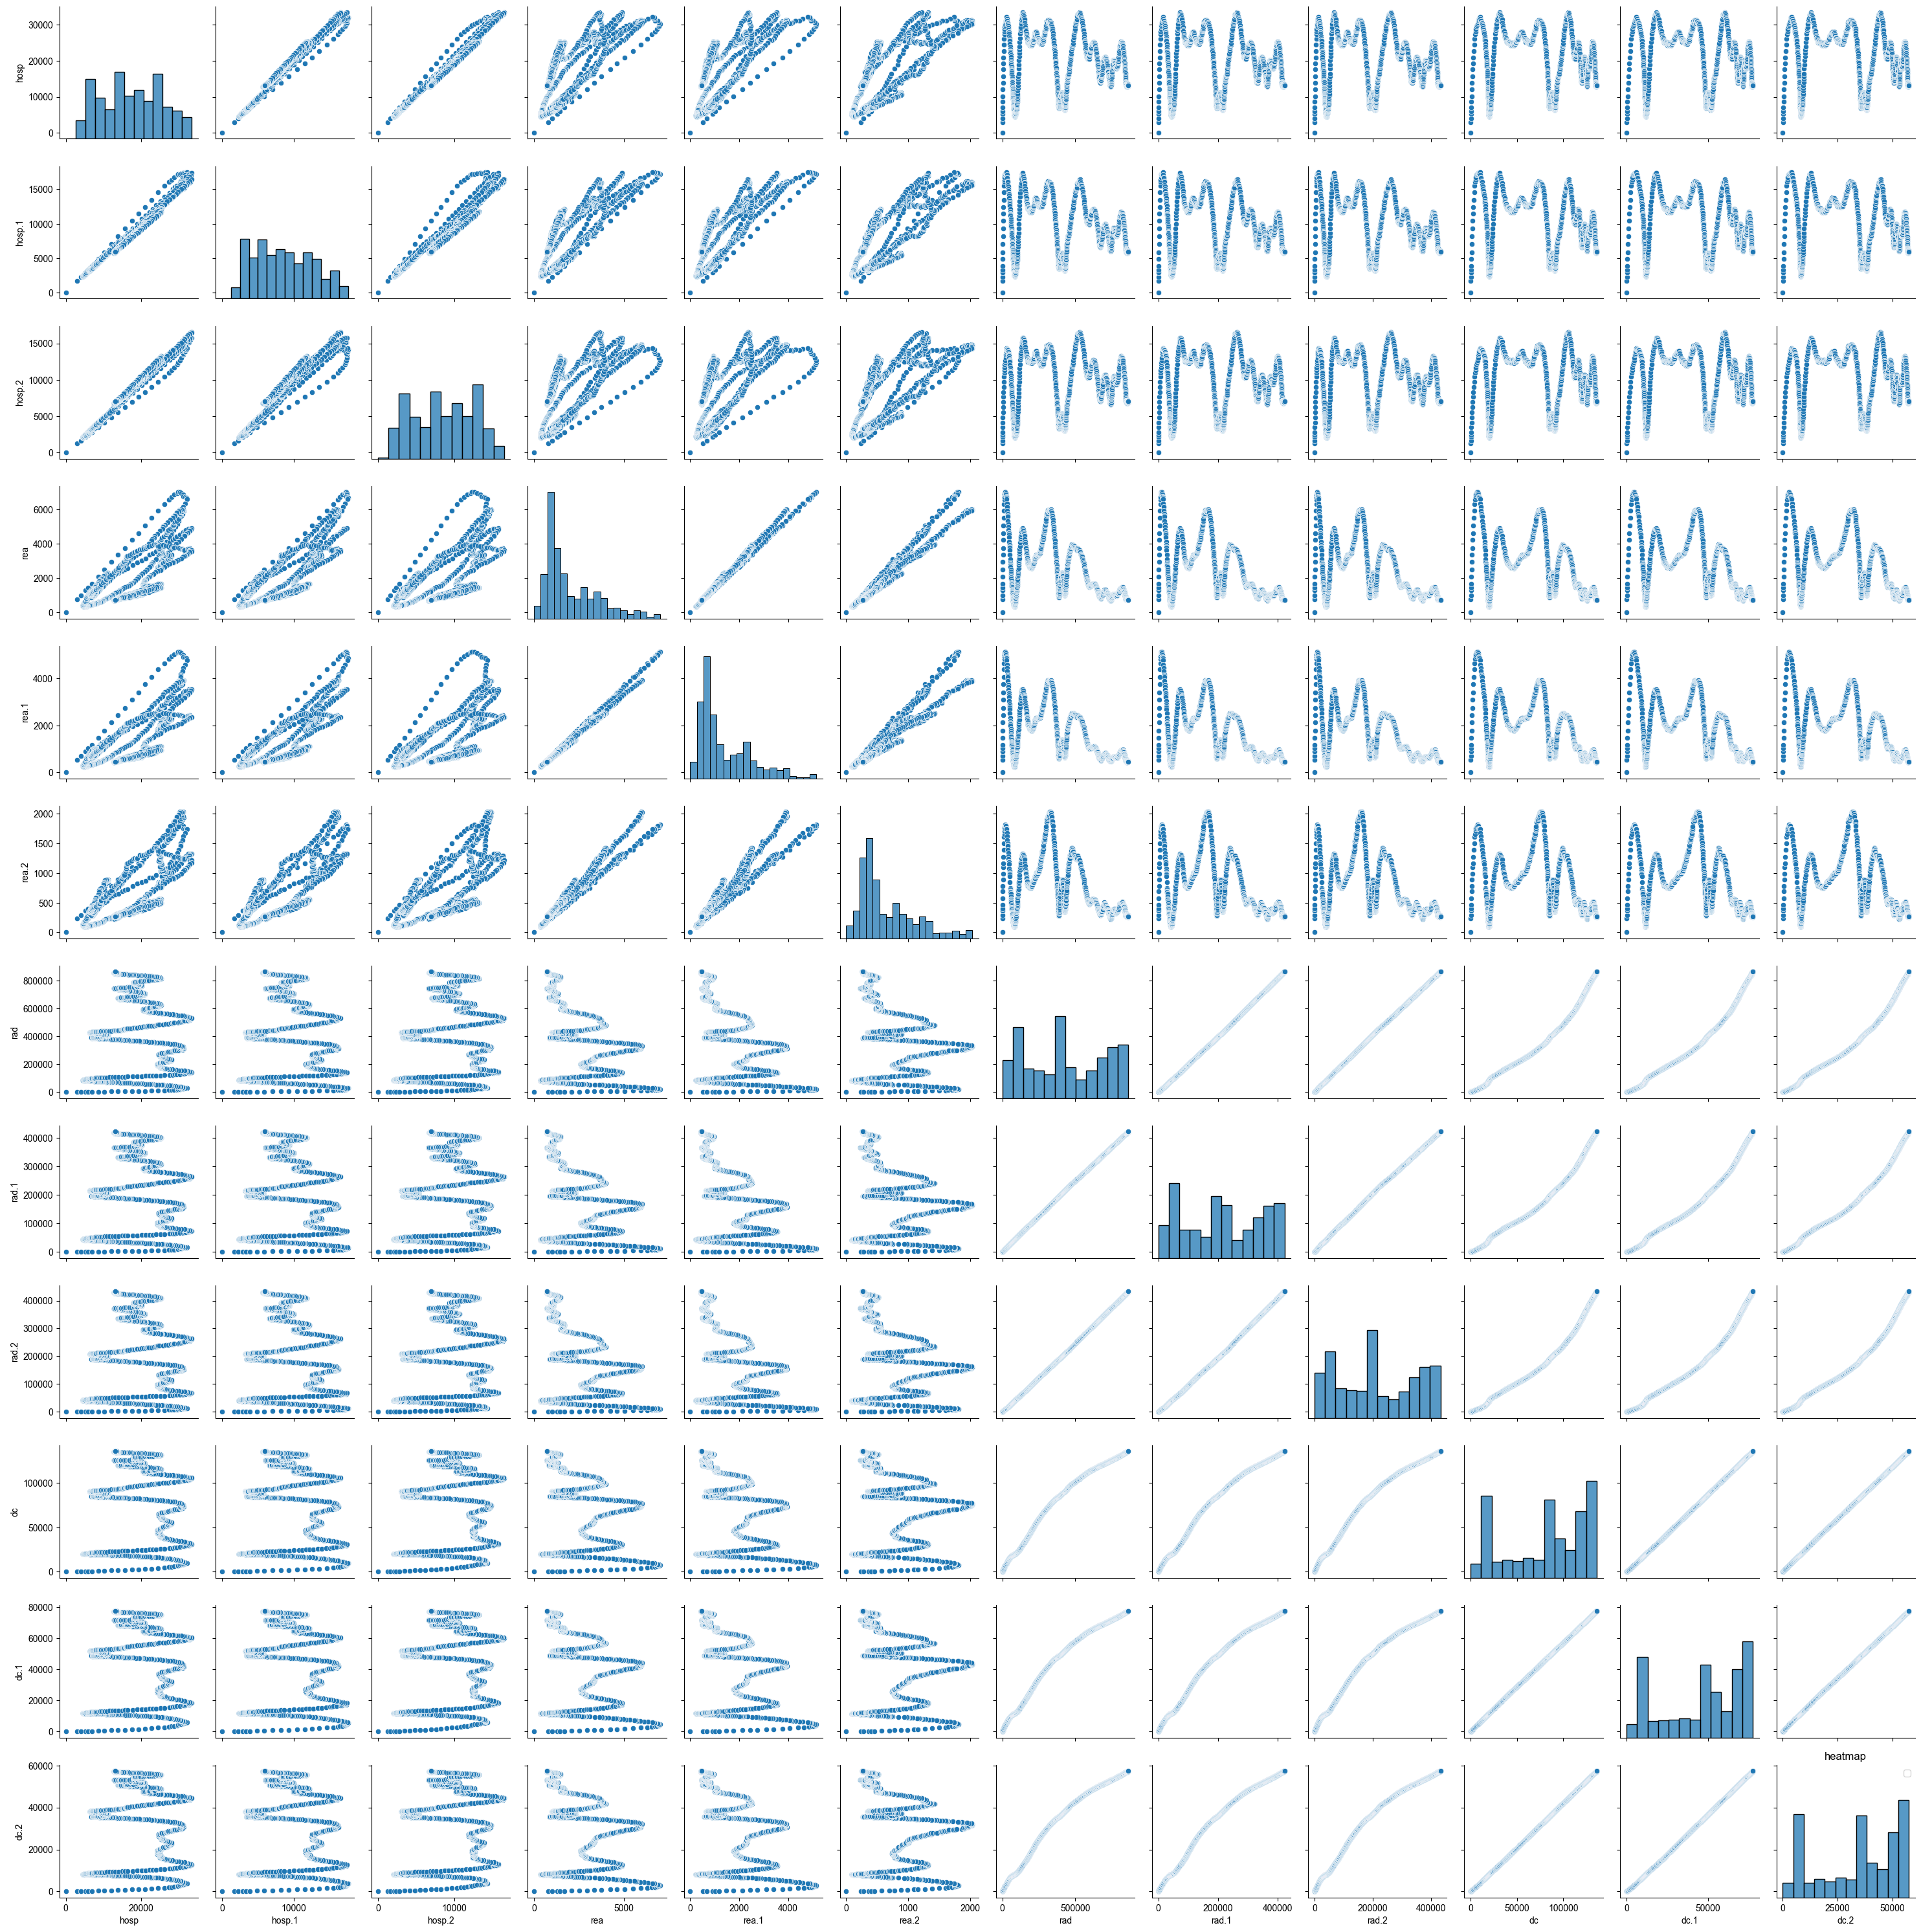

In [77]:
sns.pairplot(df)
plt.title("heatmap")
plt.legend()
plt.tight_layout()
sns.set(font_scale=1.25)
plt.show()